In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader

from tqdm.notebook import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [2]:
RANDOM_SEED = 123
torch.manual_seed(seed=RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [4]:
import tensorflow as tf
(train_X, train_y), (test_X, test_y) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [5]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
# flatten data for fully-connected NN
train_X = train_X.reshape((train_X.shape[0], -1))
test_X = test_X.reshape((test_X.shape[0], -1))
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 784), (60000,), (10000, 784), (10000,))

In [7]:
# # Normalize data
mean_X = train_X.mean()
std_X = train_X.std()
train_X = (train_X - mean_X) / std_X
test_X = (test_X - mean_X) / std_X

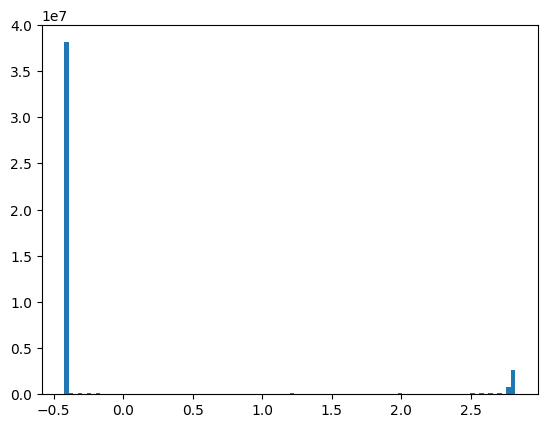

In [8]:
plt.hist(train_X.reshape(-1), bins=100)
plt.show()

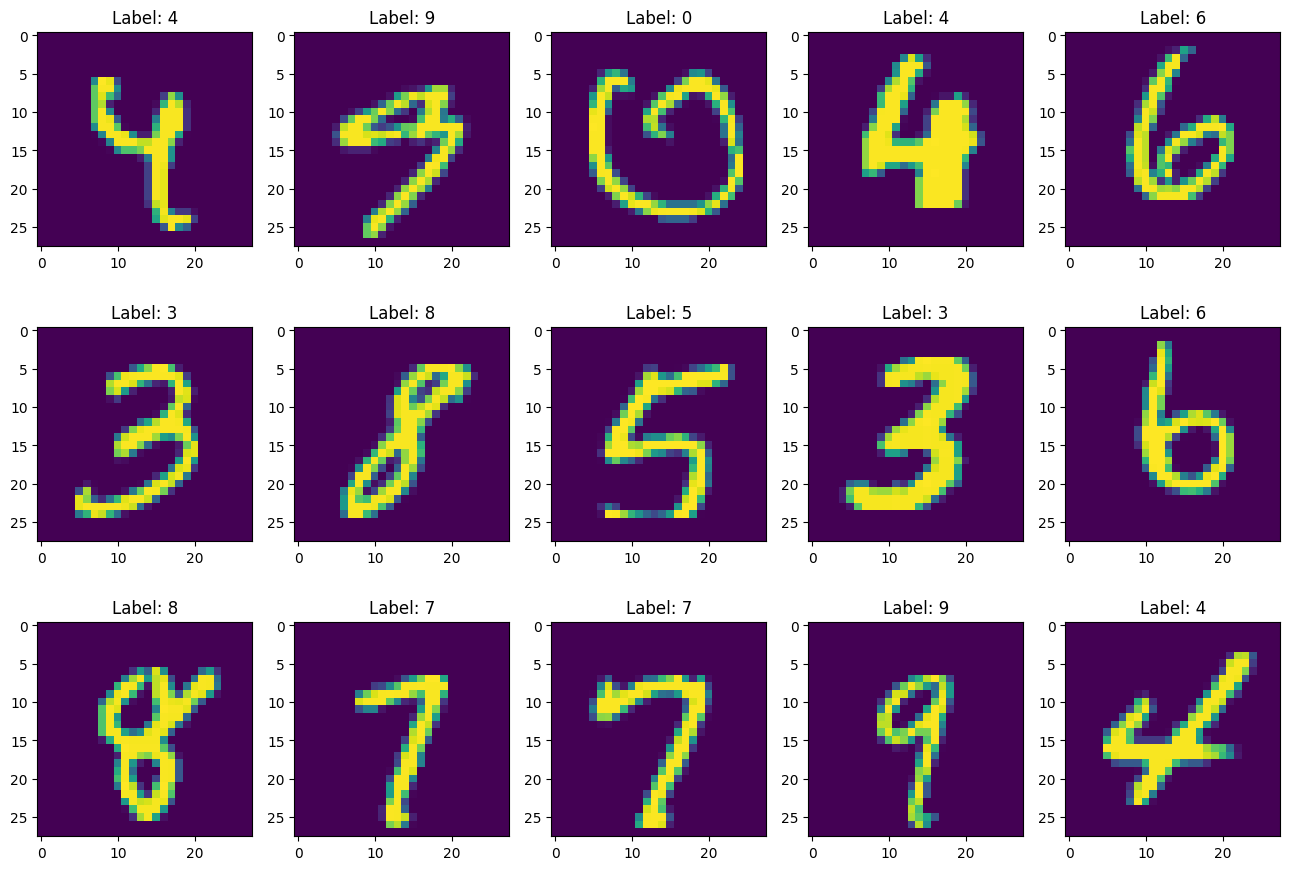

In [9]:
fig, axes = plt.subplots(3, 5, figsize=(13, 9))

for i in range(3):
    for j in range(5):
        index = np.random.choice(train_X.shape[0])
        axes[i, j].imshow(train_X[index].reshape(28, 28))
        axes[i, j].set_title(f'Label: {train_y[index]}')

fig.tight_layout()
plt.show()

## Dataset and DataLoader

In [10]:
class MNISTDataset(Dataset):
    def __init__(self, data_x, data_y):
        self.X = torch.tensor(data_x.astype('float32'))
        self.y = torch.tensor(data_y)

    def __len__(self):
        return self.X.shape[0]

    def __getitem__(self, index):
        return self.X[index], self.y[index]


In [11]:
train_dataset = MNISTDataset(train_X, train_y)
test_dataset = MNISTDataset(test_X, test_y)

In [12]:
batch_size = 1024
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, pin_memory=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
for batch in train_dataloader:
    print(batch)
    break

[tensor([[-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        ...,
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241],
        [-0.4241, -0.4241, -0.4241,  ..., -0.4241, -0.4241, -0.4241]]), tensor([6, 8, 4,  ..., 0, 3, 3], dtype=torch.uint8)]


In [14]:
batch[0].shape, batch[1].shape

(torch.Size([1024, 784]), torch.Size([1024]))

## Model

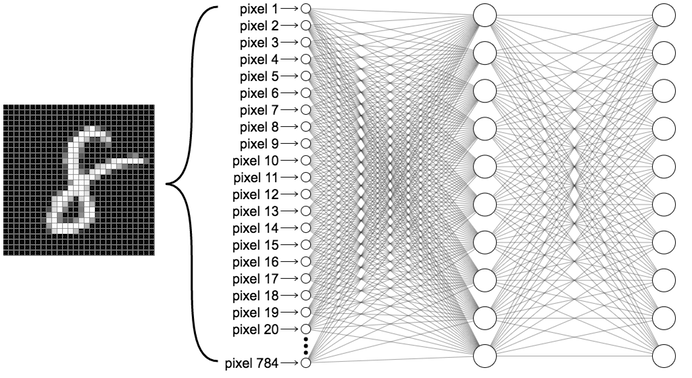

In [15]:
class SimpleNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.LeakyReLU(),
            nn.Linear(32, 16),
            nn.LeakyReLU(),
            nn.Linear(16, num_classes)
        )

    def forward(self, X):
        return self.network(X)

In [16]:
class ComplexNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Linear(32, num_classes)
        )

    def forward(self, X):
        return self.network(X)

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [18]:
my_simple_model = SimpleNet(input_size=28*28, num_classes=10)
my_simple_model.to(device)

SimpleNet(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=32, out_features=16, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
my_complex_model = ComplexNet(input_size=28*28, num_classes=10)
my_complex_model.to(device)

ComplexNet(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): LeakyReLU(negative_slope=0.01)
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Linear(in_features=512, out_features=512, bias=True)
    (9): LeakyReLU(negative_slope=0.01)
    (10): Linear(in_features=512, out_features=256, bias=True)
    (11): LeakyReLU(negative_slope=0.01)
    (12): Linear(in_features=256, out_features=256, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Linear(in_features=256, out_features=256, bias=True)
    (15): LeakyReLU(negative_slope=0.01)
    (16): Linear(in_features=256, out_features=256, bias=True)
    (17): LeakyReLU(negative_slope=0.01)
    (18): Linear(in_features=256, out

## Loss-function (criterion) and optimizer

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer_for_simple_model = torch.optim.Adam(my_simple_model.parameters(), lr=0.001)
optimizer_for_complex_model = torch.optim.Adam(my_complex_model.parameters(), lr=0.001)

## Train Loop

In [ ]:
def train(model, criterion, optimizer,
          train_dataloader, test_dataloader, num_epochs):

    train_losses = np.zeros(num_epochs)
    test_losses = np.zeros(num_epochs)

    train_accuracy_arr = np.zeros(num_epochs)
    test_accuracy_arr = np.zeros(num_epochs)

    for i_epoch in tqdm(range(num_epochs)):
        train_loss = 0
        test_loss = 0

        train_accuracy = 0
        test_accuracy = 0

        # train step
        model.train()
        for batch in train_dataloader:
            X = batch[0].to(device)
            y = batch[1].to(device)

            # model forward-pass
            preds = model(X)

            # model backward-pass
            optimizer.zero_grad()
            loss = criterion(preds, y)
            loss.backward()
            optimizer.step()

            # save loss and accuracy
            train_loss += loss.detach().cpu().numpy()
            train_accuracy += (preds.argmax(-1).detach() == y).cpu().numpy().mean()

        train_loss /= len(train_dataloader)
        train_accuracy /= len(train_dataloader)
        train_losses[i_epoch] = train_loss
        train_accuracy_arr[i_epoch] = train_accuracy

        # test step
        model.eval()
        for batch in test_dataloader:
            X = batch[0].to(device)
            y = batch[1].to(device)

            with torch.no_grad():
                # model forward-pass
                preds = model(X)
                loss = criterion(preds, y)

                # save loss and accuracy
                test_loss += loss.detach().cpu().numpy()
                test_accuracy += (preds.argmax(-1) == y).cpu().numpy().mean()


        test_loss /= len(test_dataloader)
        test_accuracy /= len(test_dataloader)

        test_losses[i_epoch] = test_loss
        test_accuracy_arr[i_epoch] = test_accuracy

    return train_losses, test_losses, train_accuracy_arr, test_accuracy_arr

## Simple model train

In [ ]:
model_total_params = sum(p.numel() for p in my_simple_model.parameters() if p.requires_grad)
print(f'Number of trainable parameters: {model_total_params}')

Number of trainable parameters: 25818


In [ ]:
train_losses, \
    test_losses, \
    train_accuracy_arr, \
    test_accuracy_arr = train(my_simple_model, criterion=criterion,
                              optimizer=optimizer_for_simple_model,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              num_epochs=40)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
simple_model_logs = dict(
    train_losses = train_losses,
    test_losses = test_losses,
    train_accuracy_arr = train_accuracy_arr,
    test_accuracy_arr = test_accuracy_arr
)

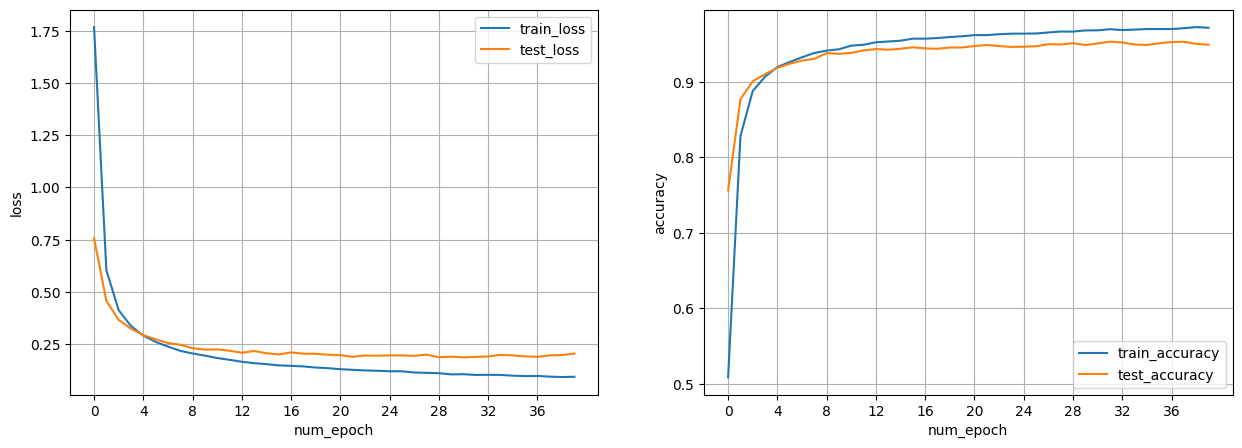

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(np.arange(train_losses.shape[0]), train_losses, label='train_loss')
ax[0].plot(np.arange(test_losses.shape[0]), test_losses, label='test_loss')
ax[0].set_xticks(np.arange(0, train_losses.shape[0], 4))
ax[0].set_xlabel('num_epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[0].grid()

ax[1].plot(np.arange(train_accuracy_arr.shape[0]), train_accuracy_arr,
           label='train_accuracy')
ax[1].plot(np.arange(test_accuracy_arr.shape[0]), test_accuracy_arr,
           label='test_accuracy')
ax[1].set_xticks(np.arange(0, train_accuracy_arr.shape[0], 4))
ax[1].set_xlabel('num_epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
ax[1].grid()
plt.show()

In [ ]:
print(f'Best test_loss = {test_losses.min()}')
print(f'Best test_accuracy = {test_accuracy_arr.max()}')

Best test_loss = 0.18488238453865052
Best test_accuracy = 0.9536850286989796


### Results:

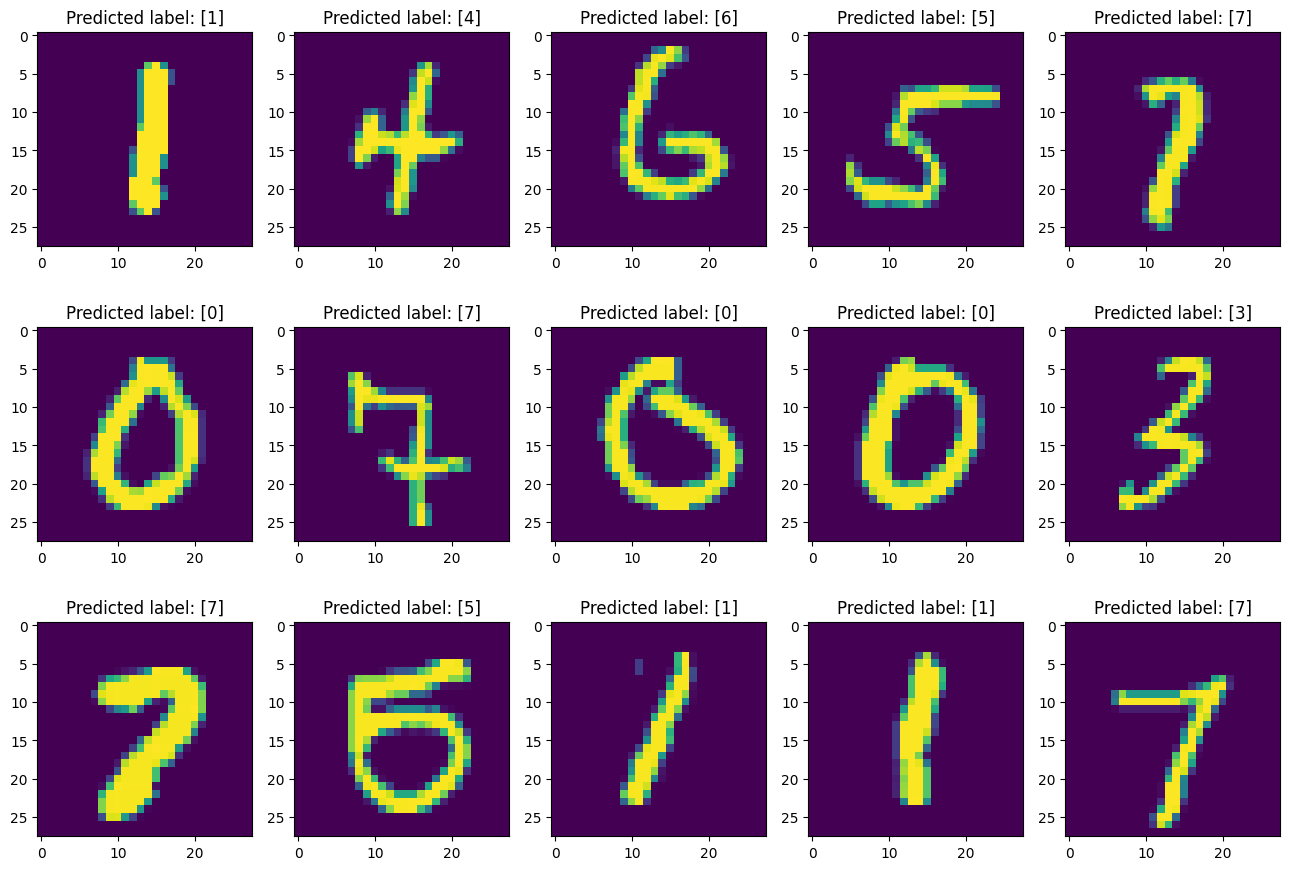

In [ ]:
fig, axes = plt.subplots(3, 5, figsize=(13, 9))

my_simple_model.eval()
for i in range(3):
    for j in range(5):
        index = np.random.choice(test_X.shape[0])
        axes[i, j].imshow(test_X[index].reshape(28, 28))
        with torch.no_grad():
            input_data = test_X[index].astype('float32')
            model_input = torch.tensor(input_data).unsqueeze(0).to(device)
            pred = my_simple_model(model_input).argmax(-1).cpu().numpy()
        axes[i, j].set_title(f'Predicted label: {pred}')

fig.tight_layout()
plt.show()

## Complex model train

In [ ]:
train_losses, \
    test_losses, \
    train_accuracy_arr, \
    test_accuracy_arr = train(my_complex_model, criterion=criterion,
                              optimizer=optimizer_for_complex_model,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              num_epochs=40)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
complex_model_logs = dict(
    train_losses = train_losses,
    test_losses = test_losses,
    train_accuracy_arr = train_accuracy_arr,
    test_accuracy_arr = test_accuracy_arr
)

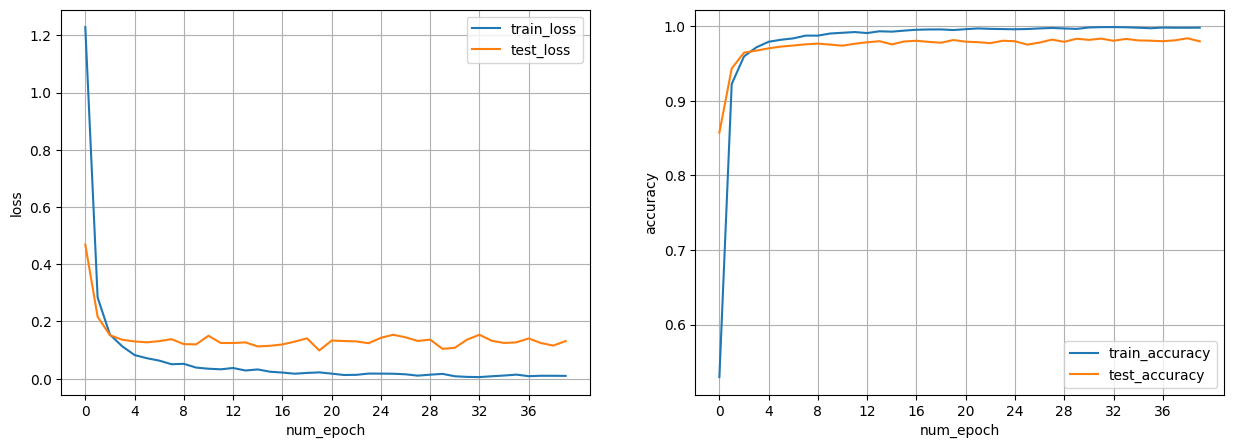

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5))

ax[0].plot(np.arange(train_losses.shape[0]), train_losses, label='train_loss')
ax[0].plot(np.arange(test_losses.shape[0]), test_losses, label='test_loss')
ax[0].set_xticks(np.arange(0, train_losses.shape[0], 4))
ax[0].set_xlabel('num_epoch')
ax[0].set_ylabel('loss')
ax[0].legend()
ax[0].grid()

ax[1].plot(np.arange(train_accuracy_arr.shape[0]), train_accuracy_arr,
           label='train_accuracy')
ax[1].plot(np.arange(test_accuracy_arr.shape[0]), test_accuracy_arr,
           label='test_accuracy')
ax[1].set_xticks(np.arange(0, train_accuracy_arr.shape[0], 4))
ax[1].set_xlabel('num_epoch')
ax[1].set_ylabel('accuracy')
ax[1].legend()
ax[1].grid()
plt.show()

In [ ]:
print(f'Best test_loss = {test_losses.min()}')
print(f'Best test_accuracy = {test_accuracy_arr.max()}')

Best test_loss = 0.0984413381665945
Best test_accuracy = 0.983641581632653


## Add BatchNorm

In [ ]:
class SimpleNetWithBN(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 32),
            nn.BatchNorm1d(num_features=32),
            nn.LeakyReLU(),
            nn.Linear(32, 16),
            nn.BatchNorm1d(num_features = 16),
            nn.LeakyReLU(),
            nn.Linear(16, num_classes)
        )

    def forward(self, X):
        return self.network(X)

In [ ]:
my_simple_model_with_BN = SimpleNetWithBN(input_size=28*28, num_classes=10)
my_simple_model_with_BN.to(device)

SimpleNetWithBN(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.01)
    (3): Linear(in_features=32, out_features=16, bias=True)
    (4): BatchNorm1d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): LeakyReLU(negative_slope=0.01)
    (6): Linear(in_features=16, out_features=10, bias=True)
  )
)

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer_for_simple_model = torch.optim.Adam(my_simple_model_with_BN.parameters(), lr=0.001)

In [ ]:
train_losses, \
    test_losses, \
    train_accuracy_arr, \
    test_accuracy_arr = train(my_simple_model_with_BN, criterion=criterion,
                              optimizer=optimizer_for_simple_model,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              num_epochs=40)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
simple_model_with_BN_logs = dict(
    train_losses = train_losses,
    test_losses = test_losses,
    train_accuracy_arr = train_accuracy_arr,
    test_accuracy_arr = test_accuracy_arr
)

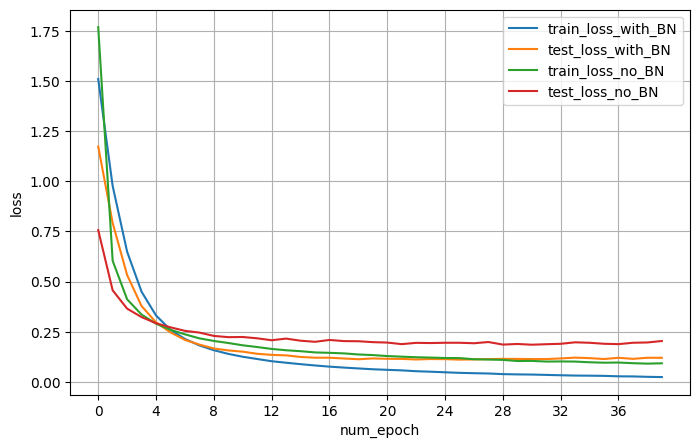

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

ax.plot(np.arange(simple_model_with_BN_logs['train_losses'].shape[0]),
           simple_model_with_BN_logs['train_losses'],
           label='train_loss_with_BN')
ax.plot(np.arange(simple_model_with_BN_logs['test_losses'].shape[0]),
           simple_model_with_BN_logs['test_losses'],
           label='test_loss_with_BN')
ax.plot(np.arange(simple_model_logs['train_losses'].shape[0]),
           simple_model_logs['train_losses'],
           label='train_loss_no_BN')
ax.plot(np.arange(simple_model_logs['test_losses'].shape[0]),
           simple_model_logs['test_losses'],
           label='test_loss_no_BN')
ax.set_xticks(np.arange(0, train_losses.shape[0], 4))
ax.set_xlabel('num_epoch')
ax.set_ylabel('loss')
ax.legend()
ax.grid()

In [ ]:
print(f'Best test_loss = {test_losses.min()}')
print(f'Best test_accuracy = {test_accuracy_arr.max()}')

Best test_loss = 0.1104978822171688
Best test_accuracy = 0.969595025510204


## Add Dropout

In [ ]:
class ComplexNetWithDropout(nn.Module):
    def __init__(self, input_size, num_classes):
        super().__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 512),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 256),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(256, 128),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.LeakyReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 32),
            nn.LeakyReLU(),
            nn.Dropout(p=0.2),
            nn.Linear(32, num_classes)
        )

    def forward(self, X):
        return self.network(X)

In [ ]:
my_complex_model_with_Dropout = ComplexNetWithDropout(input_size=28*28, num_classes=10)
my_complex_model_with_Dropout.to(device)

ComplexNetWithDropout(
  (network): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): LeakyReLU(negative_slope=0.01)
    (2): Dropout(p=0.3, inplace=False)
    (3): Linear(in_features=512, out_features=512, bias=True)
    (4): LeakyReLU(negative_slope=0.01)
    (5): Dropout(p=0.3, inplace=False)
    (6): Linear(in_features=512, out_features=512, bias=True)
    (7): LeakyReLU(negative_slope=0.01)
    (8): Dropout(p=0.3, inplace=False)
    (9): Linear(in_features=512, out_features=512, bias=True)
    (10): LeakyReLU(negative_slope=0.01)
    (11): Dropout(p=0.3, inplace=False)
    (12): Linear(in_features=512, out_features=512, bias=True)
    (13): LeakyReLU(negative_slope=0.01)
    (14): Dropout(p=0.3, inplace=False)
    (15): Linear(in_features=512, out_features=256, bias=True)
    (16): LeakyReLU(negative_slope=0.01)
    (17): Dropout(p=0.3, inplace=False)
    (18): Linear(in_features=256, out_features=256, bias=True)
    (19): LeakyReLU(negative_slope=

In [ ]:
criterion = nn.CrossEntropyLoss()

optimizer_for_complex_model = torch.optim.Adam(my_complex_model_with_Dropout.parameters(), lr=0.001)

In [ ]:
train_losses, \
    test_losses, \
    train_accuracy_arr, \
    test_accuracy_arr = train(my_complex_model_with_Dropout, criterion=criterion,
                              optimizer=optimizer_for_complex_model,
                              train_dataloader=train_dataloader,
                              test_dataloader=test_dataloader,
                              num_epochs=40)

  0%|          | 0/40 [00:00<?, ?it/s]

In [ ]:
complex_model_with_Dropout_logs = dict(
    train_losses = train_losses,
    test_losses = test_losses,
    train_accuracy_arr = train_accuracy_arr,
    test_accuracy_arr = test_accuracy_arr
)

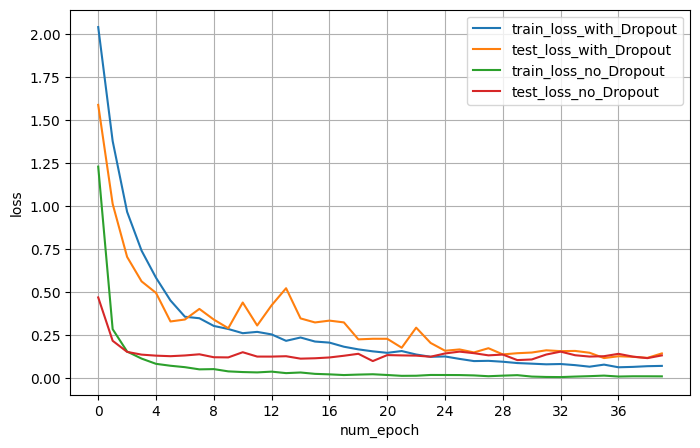

In [ ]:
fig, ax = plt.subplots(1, 1, figsize = (8, 5))

ax.plot(np.arange(complex_model_with_Dropout_logs['train_losses'].shape[0]),
           complex_model_with_Dropout_logs['train_losses'],
           label='train_loss_with_Dropout')
ax.plot(np.arange(complex_model_with_Dropout_logs['test_losses'].shape[0]),
           complex_model_with_Dropout_logs['test_losses'],
           label='test_loss_with_Dropout')
ax.plot(np.arange(complex_model_logs['train_losses'].shape[0]),
           complex_model_logs['train_losses'],
           label='train_loss_no_Dropout')
ax.plot(np.arange(complex_model_logs['test_losses'].shape[0]),
           complex_model_logs['test_losses'],
           label='test_loss_no_Dropout')
ax.set_xticks(np.arange(0, train_losses.shape[0], 4))
ax.set_xlabel('num_epoch')
ax.set_ylabel('loss')
ax.legend()
ax.grid()

In [ ]:
print(f'Best test_loss = {test_losses.min()}')
print(f'Best test_accuracy = {test_accuracy_arr.max()}')

Best test_loss = 0.11593215204775334
Best test_accuracy = 0.9811324139030612
